First 5 rows of the dataset:
  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5 

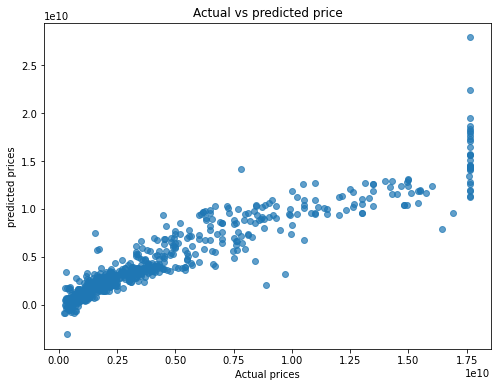

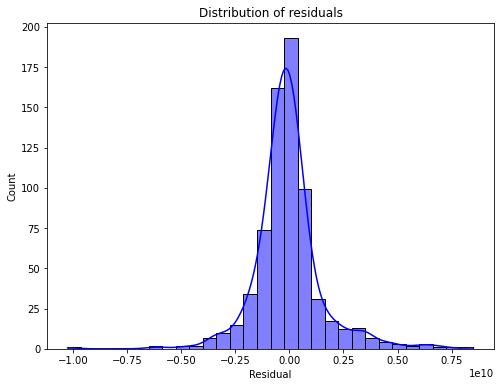

In [14]:
#install libraries (uncomment if needed)
# !pip install pandas numpy seaborn scikit-learn matplotlib

#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# load the dataset
# Assuming 'house_price.csv' is an current directory
data = pd.read_csv('housePrice.csv') # Replace with actual file path
print("First 5 rows of the dataset:")
print(data.head())

# datset info
print("\nDataset information:")
print(data.info())

# check from missing values
print("\nMissing values:")
print(data.isnull().sum())

# convert 'area' and 'room' in to numaric
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
data['Room'] = pd.to_numeric(data['Room'], errors='coerce')

# Fill missing values (example:medion for numarical columns)
data['Area'] = data['Area'].fillna(data['Area'].median())
data['Room'] = data['Room'].fillna(data['Room'].median())

# handle outliers (example: capping)
upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit,data['Price'])

# Encoding the 'location' cloumns using one-hot encoding
data = pd.get_dummies(data, columns=['Address'], drop_first=True)
print("Dataset after Encoding:")
print(data.head())


from sklearn.preprocessing import MinMaxScaler

# Normalize numaric columns
scaler = MinMaxScaler()
data[['Area', 'Room']] = scaler.fit_transform(data[['Area', 'Room']])

#Define features and target veriable
X = data.drop('Price', axis=1)
y = data['Price']

#split the dataset info training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Training set area: {X_train.shape}")
print(f"Testing set area: {X_test.shape}")

#initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Model Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

#make prediction on the test set
y_pred = model.predict(X_test)

#Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:2f}")

#scatter plot of actual vs predicted price
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs predicted price")
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.show()

# residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of residuals")
plt.xlabel("Residual")
plt.show()